In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.svm import SVR
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
import time

In [2]:
notebook_start_time = time.time()

In [3]:
raw_data = pd.read_csv('epi_r.csv')
raw_data = raw_data.dropna(axis=0, how="any")

In [4]:
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

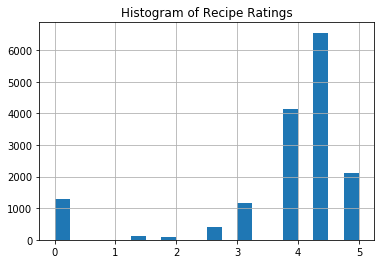

In [5]:
#Recipe ratings histogram
raw_data.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [6]:
# Count nulls 
null_count = raw_data.isnull().sum()
null_count[null_count>0]

Series([], dtype: int64)

In [7]:
raw_data.rating.describe()

count    15864.000000
mean         3.760952
std          1.285518
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

In [8]:
#Outcome
#y_modified = np.where(raw_data["rating"] > 4,1,0)

In [9]:
#def start_SVR():
#    svr = SVR()
#    x = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
#    y_modified = np.where(raw_data["rating"] > 3,1,0)
#    return x, y_modified, svr

In [10]:
def start_SVR():
    start_time = time.time()
    svr = SVR()
    x = raw_data.drop(['rating', 'title'], 1)
    y_modified = np.where(raw_data["rating"] > 3.76,1,0)
    return x, y_modified, svr,start_time

In [11]:
def fit_and_print(feature_selector):
    x_data, y_modified, svr,start_time = feature_selector
    svr.fit(x_data,y_modified)
    print(x_data.shape)
    print("Score: %0.9f" %(svr.score(x_data, y_modified)))
    print("Cross Validation:")
    print(cross_val_score(svr, x_data, y_modified, cv=5))
    print("\nRuntime:")
    print("--- %s seconds ---" % (time.time() - start_time))

In [12]:
def variance_threshold_selector():
    x, y_modified, svr,start_time = start_SVR()
    sel = VarianceThreshold(threshold=(.9 * (1 - .9)))
    x_data=sel.fit_transform(x)
    return x_data, y_modified, svr,start_time

In [13]:
start_SVR()
fit_and_print(variance_threshold_selector())

(15864, 31)
Score: 0.924511389
Cross Validation:
[ 0.08983568  0.07291367  0.08274348  0.10279872  0.09956434]

Runtime:
--- 484.688672542572 seconds ---


In [14]:
def select_k_best():
    x, y_modified, svr,start_time = start_SVR()
    x_data = SelectKBest(chi2, k=30).fit_transform(x, y_modified)
    return x_data, y_modified, svr,start_time

In [15]:
start_SVR()
fit_and_print(select_k_best())

(15864, 30)
Score: 0.912671876
Cross Validation:
[ 0.0740986   0.04969971  0.06998488  0.08906999  0.08302533]

Runtime:
--- 470.3539514541626 seconds ---


In [16]:
start_SVR()
fit_and_print(select_k_best())

(15864, 30)
Score: 0.912671876
Cross Validation:
[ 0.0740986   0.04969971  0.06998488  0.08906999  0.08302533]

Runtime:
--- 470.2483470439911 seconds ---


In [17]:
def pca_selector(number_components):
    x, y_modified, svr,start_time = start_SVR()
    pca = PCA(n_components=number_components)
    pca.fit(x,y_modified)
    x_data=pca.transform(x)
    return x_data, y_modified, svr,start_time

In [18]:
#Using PCA for feature selection
numbers= (5,10,15,20,25,30)
for num in numbers:
    start_SVR()
    print("%0.f PCA components:" % (num))
    fit_and_print(pca_selector(num))

5 PCA components:
(15864, 5)
Score: 0.946305084
Cross Validation:
[ 0.12608954  0.11054274  0.10483619  0.11711793  0.12070241]

Runtime:
--- 357.4535975456238 seconds ---
10 PCA components:
(15864, 10)
Score: 0.947346064
Cross Validation:
[ 0.12514635  0.10719303  0.10491496  0.12119748  0.1224523 ]

Runtime:
--- 356.14374136924744 seconds ---
15 PCA components:
(15864, 15)
Score: 0.943879629
Cross Validation:
[ 0.11866188  0.10009232  0.10085507  0.11828994  0.12018191]

Runtime:
--- 373.71908354759216 seconds ---
20 PCA components:
(15864, 20)
Score: 0.939685994
Cross Validation:
[ 0.11201091  0.09439218  0.09732863  0.11452856  0.11620402]

Runtime:
--- 410.21138978004456 seconds ---
25 PCA components:
(15864, 25)
Score: 0.935257588
Cross Validation:
[ 0.1035068   0.08718113  0.09304452  0.11081147  0.11098438]

Runtime:
--- 443.59876132011414 seconds ---
30 PCA components:
(15864, 30)
Score: 0.930785813
Cross Validation:
[ 0.09623422  0.07964887  0.08879929  0.10789961  0.10578314

In [19]:
print("\nNotebook Runtime:")
print("--- %s seconds ---" % (time.time() - notebook_start_time))


Notebook Runtime:
--- 3847.485330581665 seconds ---


In [20]:
def select_from_model():
    x, y_modified, svr,start_time = start_SVR()
    clf = LassoCV()
    sfm = SelectFromModel(clf, threshold=0.45)
    sfm.fit(x, y_modified)
    sfm.transform(x)
    x_data = sfm.transform(x)
    return x_data, y_modified, svr,start_time

In [21]:
start_SVR()
fit_and_print(select_from_model())


C:\Users\shaba\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\shaba\Anaconda3\lib\site-packages\sklearn\feature_selection\base.py:80: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)


ValueError: Found array with 0 feature(s) (shape=(15864, 0)) while a minimum of 1 is required.

In [ ]:
print("\nNotebook Runtime:")
print("--- %s seconds ---" % (time.time() - notebook_start_time))

In [ ]:
#xa = raw_data.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
#svc = SVC(C=1)
#rfe = RFE(estimator=svc, n_features_to_select=20, step=1)
#rfe.fit(xa, y_modified)
#x2=rfe.transform(xa)

In [ ]:
#x2.shape

In [ ]:
#clf = ExtraTreesClassifier()
#clf = clf.fit(xa, y_modified)
#clf.feature_importances_array([ 0.04...,  0.05...,  0.4...,  0.4...])
#model = SelectFromModel(clf, prefit=True)
#X_new = model.transform(X)
#X_new.shape